# Use of NetworkX algorithms

In [1]:
import AlloViz

## System setup

In [2]:
system = AlloViz.Protein(pdb="../test/data/protein.pdb",
                         trajs="../test/data/traj_1.xtc")

/home/frann/miniconda3/envs/alloviz/lib/python3.9/site-packages/MDAnalysis/topology/PDBParser.py:328: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


In [3]:
system.calculate(pkgs="PyInteraph2_Contacts")

PyInteraph2_Contacts
adding raw data of PyInteraph2_Contacts for ../test/data/protein.pdb:  ['./data/PyInteraph2_Contacts/raw/1.pq']


In [4]:
system.filter(filterings="All")
# the same as doing: system.pyraj_CA.filter(filterings="Spatially_distant")

Filtered networks are stored as NetworkX Graph objects and can be passed to NetworkX analysis functions.

In [5]:
system.PyInteraph2_Contacts.All.graphs

{'weight': <networkx.classes.graph.Graph at 0x7f3c86408f40>}

In [6]:
graph = system.PyInteraph2_Contacts.All.graphs["weight"]

## NetworkX

To use NetworkX's functions, we must specify that the edge weights are stored with the name "weight". For example, if we want to use NetworkX's shortest paths analysis:

In [7]:
from networkx.algorithms.shortest_paths.generic import shortest_path

In [8]:
paths = shortest_path(graph, weight="weight")
paths

{'ASN:4': {'ASN:4': ['ASN:4'],
  'SER:5': ['ASN:4', 'SER:5'],
  'THR:33': ['ASN:4', 'THR:33'],
  'VAL:121': ['ASN:4', 'VAL:121'],
  'LYS:90': ['ASN:4', 'THR:33', 'LYS:90'],
  'ASN:150': ['ASN:4', 'VAL:121', 'ASN:150'],
  'TYR:152': ['ASN:4', 'VAL:121', 'TYR:152'],
  'HIS:91': ['ASN:4', 'THR:33', 'LYS:90', 'HIS:91'],
  'PHE:6': ['ASN:4', 'VAL:121', 'TYR:152', 'PHE:6'],
  'SER:7': ['ASN:4', 'SER:5', 'SER:7'],
  'VAL:30': ['ASN:4', 'VAL:121', 'TYR:152', 'PHE:6', 'VAL:30'],
  'VAL:82': ['ASN:4', 'THR:33', 'LYS:90', 'HIS:91', 'VAL:82'],
  'GLY:85': ['ASN:4',
   'VAL:121',
   'TYR:152',
   'PHE:6',
   'VAL:30',
   'PRO:32',
   'ALA:89',
   'GLY:85'],
  'ASN:15': ['ASN:4', 'VAL:121', 'ASN:150', 'ASN:15'],
  'TYR:17': ['ASN:4', 'VAL:121', 'TYR:152', 'TYR:17'],
  'TYR:9': ['ASN:4', 'VAL:121', 'TYR:152', 'TYR:9'],
  'PRO:32': ['ASN:4', 'VAL:121', 'TYR:152', 'PHE:6', 'VAL:30', 'PRO:32'],
  'LYS:11': ['ASN:4', 'VAL:121', 'TYR:152', 'TYR:17', 'LYS:11'],
  'GLY:8': ['ASN:4', 'SER:5', 'SER:7', 'GLY:8

## Alternative NetworkX's centrality analyses and visualization

AlloViz's `analyze` method allows to use any NetworkX analysis that returns a list of node values or edge values (e.g., node or edge centrality analyses), and its posterior visualization with the `view` method.

The absolute Python import of the analysis function with a custom short name for it must be passed as a dictionary to the `analyze` method. The default node_dict and edge_dict (with "btw" and "cfb") are part of the Analysis module:

In [9]:
AlloViz.AlloViz.Analysis.nodes_dict

{'btw': 'networkx.algorithms.centrality.betweenness_centrality',
 'cfb': 'networkx.algorithms.centrality.current_flow_betweenness_centrality'}

Therefore, a new centrality analysis function for e.g. the nodes can be used with:

In [10]:
system.analyze(elements="nodes", metrics="load", nodes_dict={"load": "networkx.algorithms.centrality.load_centrality"})

(<networkx.classes.graph.Graph object at 0x7f3d009a6fd0>, functools.partial(<function newman_betweenness_centrality at 0x7f3c8709a280>), 'load')
adding analyzed nodes <AlloViz.Wrappers.PyInteraph2_w.PyInteraph2_Contacts object at 0x7f3c85f1dac0> All data of for ../test/data/protein.pdb


The load centrality of a node is the fraction of all shortest paths that pass through that node. The results can be visualized as a usual:

NGLWidget()

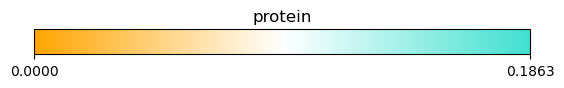

In [11]:
system.view("PyInteraph2_Contacts", "load", "All", "nodes")